In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mlp

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Import data

In [3]:
df = pd.read_csv("data_2_cat.csv")

In [5]:
df['tier'] = df['tier'].replace(['First','Second'],['1','2'])
df['tier'] = df['tier'].astype(float)

In [9]:
df = df.drop('Country',axis=1)

In [6]:
df = df.drop('Happiness Rank',axis=1)

In [7]:
df = df.drop('Happiness Score',axis=1)

In [10]:
df.head()

,Year,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,tier
0,2015,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1.0
1,2015,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1.0
2,2015,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0
3,2015,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1.0
4,2015,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1.0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('tier',axis=1)
y = df['tier']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (744, 7), (744,)
Train Data: (187, 7), (187,)


Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
trees = DecisionTreeClassifier(max_depth=2, random_state=42)

In [35]:
trees = trees.fit(X_train,y_train)

[Text(0.5, 0.8333333333333334, 'X[1] <= 1.124\ngini = 0.499\nsamples = 744\nvalue = [392, 352]'),
 Text(0.25, 0.5, 'X[3] <= 0.44\ngini = 0.4\nsamples = 464\nvalue = [128, 336]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.032\nsamples = 186\nvalue = [3, 183]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.495\nsamples = 278\nvalue = [125, 153]'),
 Text(0.75, 0.5, 'X[4] <= 0.156\ngini = 0.108\nsamples = 280\nvalue = [264, 16]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.07\nsamples = 274\nvalue = [264, 10]')]

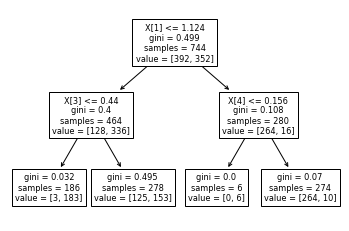

In [36]:
from sklearn import tree
tree.plot_tree(trees) 

In [22]:
df.columns

Index(['Year', 'GDP per Capita', 'Social support', 'Life Expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Generosity', 'tier'],
      dtype='object')

In [29]:
feature_cols = ['Year', 'GDP per Capita', 'Social support', 'Life Expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Generosity']

In [25]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=641a703994c19790afe2ac00b48c3ef128aac5c7258f81ba3af6462389300ca2
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(trees, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('happiness.png')
Image(graph.create_png())
# to fix error must install something on anaconda 
#https://askubuntu.com/questions/1214728/pydot-invocationexception-graphvizs-executables-not-found

In [38]:
y_pred = trees.predict(X_test)

Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) #train linear regression on X and y
lin_reg.intercept_, lin_reg.coef_ # learning parameters 

(-15.276913725205024,
 array([ 0.00888718, -0.50072437, -0.2044792 , -0.35579325, -0.67446692,
         0.03212242,  0.02100288]))

In [40]:
y_pred_lr = lin_reg.predict(X_test)

Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [43]:
y_pred_lor = log_reg.predict(X_test)

### the J48/C4.5 algorithm

It is based on the principle of entropy reduction and information gain. Many times it leads to overfitting and thus to improve the rate of classification and overcome over-fitting, a random forest tree can be used subsets as it builds different trees from sub sets of training data

https://github.com/serengil/chefboost

In [44]:
pip install chefboost

In [45]:
from chefboost import Chefboost as chef

In [46]:
config = {'algorithm': 'C4.5'}

In [ ]:
model = chef.fit(df, config = config, target_label = 'Decision')

CART which is the algorithm used by sklearn library for the decision tree classifier is very similar to C4.5 so i'll be going with that for now

In [50]:
from sklearn.tree import DecisionTreeClassifier
trees = DecisionTreeClassifier()
trees = trees.fit(X_train,y_train)
y_pred1 = trees.predict(X_test)

Measure training set accuracy of decision trees

In [51]:
from sklearn import metrics
y_pred1_train = trees.predict(X_train)
print("Training set accuracy:", metrics.accuracy_score(y_train, y_pred1_train))

Training set accuracy: 1.0


Measure test set accuracy of decision trees

In [52]:
print("Test set accuracy:", metrics.accuracy_score(y_test, y_pred1))

Test set accuracy: 0.8556149732620321


measure the accuracy using 10-fold cross-validation on the training set for decision trees

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
print("accuracy scores for 10 folds: ", cross_val_score(trees, X_train, y_train, scoring="accuracy", cv = 10))
mean_score = cross_val_score(trees, X_train, y_train, scoring="accuracy", cv = 10).mean()
print("mean of accuracy scores: " ,mean_score)

accuracy scores for 10 folds:  [0.84       0.85333333 0.86666667 0.84       0.90540541 0.86486486
 0.74324324 0.90540541 0.85135135 0.85135135]
mean of accuracy scores:  0.8495315315315315


Explain accuracy results

- The accuracy of the training set tells us that the classifier in the best scenario is 100% accurate
- The accuracy of the test set tells us that the classifier generralises rather well to unseen examples (~85%), the classifier does not seem to overfit
- 10 fold cross validation gives us the average estimate of the classifier : 85% 

Use the major metrics: accuracy, TP rate (sensitivity), FP rate (specifity), precision, recall, F measure, the ROC area 

[[66 10]
 [17 94]]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


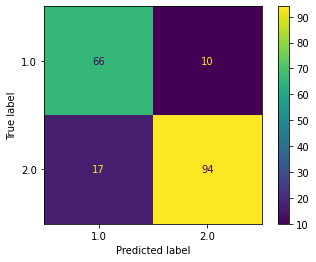

Sensitivity :  0.868421052631579
Specificity :  0.8468468468468469
Precision Score of the classifier is: 0.7951807228915663
Recall Score of the classifier is: 0.868421052631579
F-measure of the classifier is: 0.8301886792452832
              precision    recall  f1-score   support

     class 0       0.80      0.87      0.83        76
     class 1       0.90      0.85      0.87       111

    accuracy                           0.86       187
   macro avg       0.85      0.86      0.85       187
weighted avg       0.86      0.86      0.86       187

AUC: 0.86


In [60]:
#confusion matrix 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, y_pred1))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(trees, X_test, y_test)
plt.show()

#Sensitivity
CM = confusion_matrix(y_test, y_pred1)
sensitivity = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity )
#specificity
specificity = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity)
#Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred1)}")
#recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred1)}")
#F-measure
from sklearn.metrics import f1_score
print(f"F-measure of the classifier is: {f1_score(y_test,y_pred1)}")
#classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
report = classification_report(y_test, y_pred1, target_names=target_names)
print(report)
#ROC area under the curve
from sklearn.metrics import roc_auc_score
# Generate class membership probabilities
y_preb_probs = trees.predict_proba(X_test)
y_preb_probs = y_preb_probs[:, 1]
auc = roc_auc_score(y_test, y_preb_probs)
print('AUC: %.2f' % auc)

### Experiment with various decision tree parameters that control the size of the tree. 

For example: depth of the tree, confidence threshold for pruning, splitting criteria and the minimal number of instances permissible per leaf.

https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3#:~:text=InDepth%3A%20Parameter%20tuning%20for%20Decision%20Tree%201%20max_depth,consider%20when%20looking%20for%20the%20best%20split.%20

https://python.plainenglish.io/decision-tree-parameters-explanations-tuning-a2b0749976e5

depth of the tree :

The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auccuracy scores

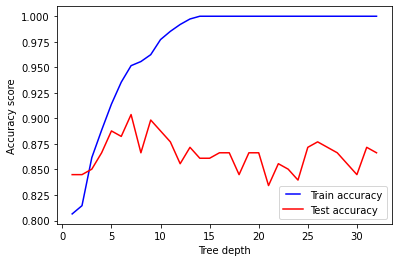

In [69]:
max_depths = np.linspace(1, 32, 32, endpoint=True).astype(int)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    acc = metrics.accuracy_score(y_train, train_pred)
    # Add to previous train results
    train_results.append(acc)
    
    y_pred = dt.predict(X_test)
    acc2 = metrics.accuracy_score(y_test, y_pred)
    # Add to previous test results
    test_results.append(acc2)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train accuracy")
line2, = plt.plot(max_depths, test_results, 'r', label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("Tree depth")
plt.show()

spliting criteria :

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

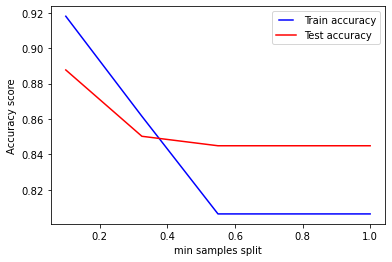

In [161]:
min_samples_splits = np.linspace(0.1, 1.0, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    train_pred = dt.predict(X_train)
    acc = metrics.accuracy_score(y_train, train_pred)    
    train_results.append(acc)
    
    y_pred = dt.predict(X_test)
    acc2 = metrics.accuracy_score(y_test, y_pred)
    test_results.append(acc2)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train accuracy")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("min samples split")
plt.show()

minimal number of instances permissible per leaf :

min_samples_leaf describe the minimum number of samples of samples at the leafs, the base of the tree.

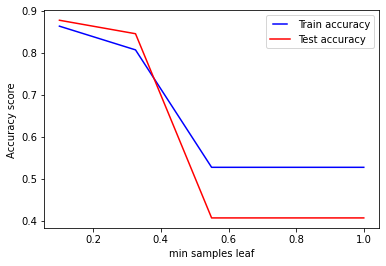

In [162]:
min_samples_leafs = np.linspace(0.1, 1.0, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    train_pred = dt.predict(X_train)
    acc = metrics.accuracy_score(y_train, train_pred)    
    train_results.append(acc)
    
    y_pred = dt.predict(X_test)
    acc2 = metrics.accuracy_score(y_test, y_pred)
    test_results.append(acc2)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train accuracy")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("min samples leaf")
plt.show()

Number of features :

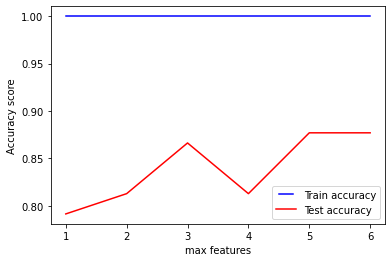

In [75]:
max_features = list(range(1, X.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    train_pred = dt.predict(X_train)
    acc = metrics.accuracy_score(y_train, train_pred)    
    train_results.append(acc)
    
    y_pred = dt.predict(X_test)
    acc2 = metrics.accuracy_score(y_test, y_pred)
    test_results.append(acc2)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train accuracy")
line2, = plt.plot(max_features, test_results, 'r', label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("max features")
plt.show()

use Scikit-Learn’s GridSearchCV to optimize hyperparameters for you

documentation : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [76]:
from sklearn.model_selection import GridSearchCV

In [83]:
params = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 100)),'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 3528 candidates, totalling 10584 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]},
             verbose=1)

In [84]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=19)

In [85]:
sorted(grid_search_cv.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'param_max_leaf_nodes',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [86]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.00532238, 0.00801516, 0.00797256, ..., 0.01236526, 0.0125672 ,
        0.01600997]),
 'std_fit_time': array([3.78245778e-03, 1.82220436e-04, 4.78211383e-05, ...,
        4.50677651e-03, 3.27499656e-03, 2.13375378e-05]),
 'mean_score_time': array([0.00579365, 0.00266385, 0.00266369, ..., 0.00337251, 0.00319767,
        0.        ]),
 'std_score_time': array([0.00413264, 0.00376725, 0.00376703, ..., 0.00339555, 0.00411883,
        0.        ]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[4, 4, 4, ..., 150, 150, 150],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_leaf_nodes': masked_array(data=[2, 3, 4, ..., 97, 98, 99],
              mask=[Fals

Test RandomizedSearchCV 

documentation : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
from scipy.stats import randint

In [93]:
param_dist = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 100)),'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [94]:
rand_search_cv = RandomizedSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)
rand_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 15, 20, 30, 40, 50,
                                                      70, 90, 120, 150],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, 31, ...]},
                   verbose=1)

In [133]:
sorted(rand_search_cv.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'param_max_leaf_nodes',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [95]:
rand_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=40, max_leaf_nodes=12)

https://medium.com/analytics-vidhya/hyper-parameter-tuning-gridsearchcv-vs-randomizedsearchcv-499862e3ca5

Put all your results in a suitable form: 

it can be a table or a series of graphs, that visualise the variations of performance between different settings of the decision tree algorithm.

### Tree 1

Using the best working parameters, repeat the experiment, this time using training and testing data sets instead of the cross validation.

build the J48 classifier using the training data set, and test the classifier using the test data set

In [137]:
trees1 = DecisionTreeClassifier(criterion='entropy', max_depth=40, max_leaf_nodes=12)
trees1 = trees1.fit(X_train,y_train)
y_pred2 = trees1.predict(X_test)

Accuracy of the J48 classifier

In [98]:
print("Test set accuracy:", metrics.accuracy_score(y_test, y_pred2))

Test set accuracy: 0.8983957219251337


Does the decision tree generalize well to new data? How do you tell?

In [128]:
y_pred_tr = trees1.predict(X_train)
print("Training set accuracy:", metrics.accuracy_score(y_train, y_pred_tr))

Training set accuracy: 0.9153225806451613


Tree 2

Make new training and testing sets, by moving 30% of the instances from the original training set into the testing set

In [100]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=24)
print(f"Train Data: {X_train2.shape}, {y_train2.shape}")
print(f"Train Data: {X_test2.shape}, {y_test2.shape}")

Train Data: (651, 7), (651,)
Train Data: (280, 7), (280,)


In [142]:
trees2 = DecisionTreeClassifier(criterion='entropy', max_depth=40, max_leaf_nodes=12)
trees2 = trees2.fit(X_train2,y_train2)
y_pred3 = trees2.predict(X_test2)

accuracy on the training set 

In [104]:
y_pred3_train = trees2.predict(X_train2)
print("Training set accuracy:", metrics.accuracy_score(y_train2, y_pred3_train))

Training set accuracy: 0.9170506912442397


accuracy on the test set 

In [109]:
print("Test set accuracy:", metrics.accuracy_score(y_test2, y_pred3))

Test set accuracy: 0.8785714285714286


Tree 3

Make new training and testing sets, by moving 60% of the instances from the original training set into the testing set. 

In [105]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.6, random_state=24)
print(f"Train Data: {X_train3.shape}, {y_train3.shape}")
print(f"Train Data: {X_test3.shape}, {y_test3.shape}")

Train Data: (372, 7), (372,)
Train Data: (559, 7), (559,)


In [143]:
trees3 = DecisionTreeClassifier(criterion='entropy', max_depth=40, max_leaf_nodes=12)
trees3 = trees3.fit(X_train3,y_train3)
y_pred4 = trees3.predict(X_test3)

accuracy on the training set 

In [107]:
y_pred4_train = trees3.predict(X_train3)
print("Training set accuracy:", metrics.accuracy_score(y_train3, y_pred4_train))

Training set accuracy: 0.8951612903225806


accuracy on the test set 

In [108]:
print("Test set accuracy:", metrics.accuracy_score(y_test3, y_pred4))

Test set accuracy: 0.8372093023255814


other decision tree algorithms (example : random forests)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
forest = RandomForestClassifier()
forest = forest.fit(X_train,y_train)
y_predf = forest.predict(X_test)

In [131]:
print("Test set accuracy:", metrics.accuracy_score(y_test, y_predf))

Test set accuracy: 0.893048128342246


In [132]:
y_pred_t = forest.predict(X_train)
print("Training set accuracy:", metrics.accuracy_score(y_train, y_pred_t))

Training set accuracy: 1.0


In [111]:
rand_search_cv2 = RandomizedSearchCV(RandomForestClassifier(), params, verbose=1, cv=3)
rand_search_cv2.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 15, 20, 30, 40, 50,
                                                      70, 90, 120, 150],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, 31, ...]},
                   verbose=1)

In [112]:
rand_search_cv2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=42)

Tree 1

Using the best working parameters, repeat the experiment, this time using training and testing data sets instead of the cross validation.

build the classifier using the training data set, and test the classifier using the test data set

In [147]:
forest1 = RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=42)
forest1 = forest1.fit(X_train,y_train)
y_predf1 = forest1.predict(X_test)

accuracy 

In [117]:
print("Test set accuracy:", metrics.accuracy_score(y_test, y_predf1))

Test set accuracy: 0.9090909090909091


Does the decision tree generalize
well to new data? How do you tell?

In [129]:
y_pred_tr2 = forest1.predict(X_train)
print("Training set accuracy:", metrics.accuracy_score(y_train, y_pred_tr2))

Training set accuracy: 0.9758064516129032


Tree 2

Make new training and testing sets, by moving 30% of the instances from the original training set into
the testing set. Note the accuracies on the training and the testing sets.

In [148]:
forest2 = RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=42)
forest2 = forest2.fit(X_train2,y_train2)
y_predf2 = forest2.predict(X_test2)

In [123]:
y_predf2_train = forest2.predict(X_train2)
print("Training set accuracy:", metrics.accuracy_score(y_train2, y_predf2_train))

Training set accuracy: 0.9861751152073732


In [124]:
print("Test set accuracy:", metrics.accuracy_score(y_test2, y_predf2))

Test set accuracy: 0.8892857142857142


Tree 3

Make new training and testing sets, by moving 60% of the instances from the original training set into
the testing set. Note the accuracies on the training and the testing sets.

In [150]:
forest3 = RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=42)
forest3 = forest3.fit(X_train3,y_train3)
y_predf3 = forest3.predict(X_test3)

In [149]:
y_predf3_train = forest3.predict(X_train3)
print("Training set accuracy:", metrics.accuracy_score(y_train3, y_predf3_train))

Training set accuracy: 1.0


In [127]:
print("Test set accuracy:", metrics.accuracy_score(y_test3, y_predf3))

Test set accuracy: 0.8658318425760286


Mean squared error

In [154]:
from sklearn.metrics import mean_squared_error

Decision trees

In [156]:
MRE = mean_squared_error(y_test, y_pred1)
print("Default: " ,MRE)
MRE2 = mean_squared_error(y_test, y_pred2)
print("Tree 1: " ,MRE2)
MRE3 = mean_squared_error(y_test2, y_pred3)
print("Tree 2: " ,MRE3)
MRE4 = mean_squared_error(y_test3, y_pred4)
print("Tree 3: " ,MRE4)

Default:  0.10160427807486631
Tree 1:  0.10160427807486631
Tree 2:  0.12142857142857143
Tree 3:  0.16279069767441862


Random forest

In [157]:
MRE5 =mean_squared_error(y_test, y_predf)
print("Default: " ,MRE5)
MRE6 = mean_squared_error(y_test, y_predf1)
print("Tree 1: " ,MRE6)
MRE7 = mean_squared_error(y_test2, y_predf2)
print("Tree 2: " ,MRE7)
MRE8 = mean_squared_error(y_test3, y_predf3)
print("Tree 3: " ,MRE8)

Default:  0.10695187165775401
Tree 1:  0.11229946524064172
Tree 2:  0.1
Tree 3:  0.1252236135957066


https://stats.stackexchange.com/questions/423514/can-rmse-and-mae-have-the-same-value

https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared

### Conclusions

what was the influence of various parameters on the classifier’s performance? Hypothesise
why.

Analyse Tree 1, Tree 2 and Tree 3 from the point of view of the problem of classifier over-fitting. Do you notice the effects of over-fitting? How? Note your conclusions in the Jupyter notebook.

to make conclusions about overfitting, you must compare accuracies of your three decision trees on training and on testing data sets.

https://towardsdatascience.com/how-to-implement-and-evaluate-decision-tree-classifiers-from-scikit-learn-36ef7f037a78